# 用户指南，第21章：元素排序
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_21_sorting.html)

TODO

In [1]:
from music21 import *
s = stream.Measure()
ts1 = meter.TimeSignature('3/4')
s.insert(0, ts1)
s.insert(0, key.KeySignature(2))
s.insert(0, clef.TrebleClef())
s.insert(0, note.Note('C#4'))
s.insert(1, note.Note('D#4'))

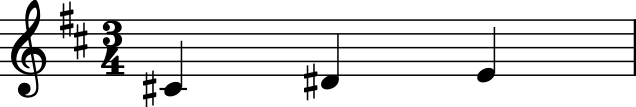

In [2]:
e = note.Note('E4')
s.append(e)
s.show()

In [3]:
s[3]

<music21.note.Note C#>

In [4]:
s[4]

<music21.note.Note D#>

In [5]:
s[-1]

<music21.note.Note E>

In [6]:
e.offset

2.0

In [7]:
e.getOffsetBySite(s)

2.0

In [8]:
s.elementOffset(e)

2.0

In [9]:
s.getElementsByOffset(2.0)[0]

<music21.note.Note E>

In [10]:
y = s.getElementsByOffset(1.0, 3.0)
(y[0], y[1])

(<music21.note.Note D#>, <music21.note.Note E>)

In [11]:
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{2.0} <music21.note.Note E>


In [12]:
(s[0], s[1], s[2])

(<music21.clef.TrebleClef>,
 <music21.key.KeySignature of 2 sharps>,
 <music21.meter.TimeSignature 3/4>)

In [13]:
(s[0].classSortOrder, s[1].classSortOrder, s[2].classSortOrder)

(0, 2, 4)

In [14]:
(clef.Clef.classSortOrder, key.KeySignature.classSortOrder, meter.TimeSignature.classSortOrder)

(0, 2, 4)

In [15]:
(note.Note.classSortOrder, base.Music21Object.classSortOrder)

(20, 20)

In [16]:
(bar.Barline.classSortOrder, instrument.Instrument.classSortOrder, metadata.Metadata.classSortOrder)

(-5, -25, -30)

In [17]:
ts2 = meter.TimeSignature('6/8')
s.insert(0, ts2)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{2.0} <music21.note.Note E>


In [18]:
d = note.Note('D')
d.priority = -10
eis = note.Note('E#')
eis.priority = 10
s.insert(1.0, d)
s.insert(2.0, eis)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D>
{1.0} <music21.note.Note D#>
{2.0} <music21.note.Note E>
{2.0} <music21.note.Note E#>


In [19]:
d.priority = 20
s.remove(d)
s.insert(1.0, d)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.0} <music21.note.Note E#>


In [20]:
ts2.priority = -5
s.remove(ts2)
s.insert(0.0, ts2)
s.show('text')

{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.0} <music21.note.Note E#>


In [21]:
for el in s.getElementsByOffset(0.0):
    el.priority = el.classSortOrder

ts2.priority = 3  # between KeySignature (priority = 2) and TimeSignature (priority = 4)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.0} <music21.note.Note E#>


In [22]:
#_DOCS_SHOW ts1.sortTuple()
ts1.sortTuple().modify(insertIndex=0) #_DOCS_HIDE

SortTuple(atEnd=0, offset=0.0, priority=4, classSortOrder=4, isNotGrace=1, insertIndex=0)

In [23]:
#_DOCS_SHOW ts2.sortTuple()
ts2.sortTuple().modify(insertIndex=118) #_DOCS_HIDE

SortTuple(atEnd=0, offset=0.0, priority=3, classSortOrder=4, isNotGrace=1, insertIndex=118)

In [24]:
ts1.sortTuple() > ts2.sortTuple()

True

In [25]:
st = sorting.SortTuple(atEnd=0, offset=10.0, priority=1, classSortOrder=4, isNotGrace=1, insertIndex=5)
st > 8.0

True

In [26]:
st.shortRepr()

'10.0 <1.4.5>'

In [27]:
ks2 = key.KeySignature(-3)
s.storeAtEnd(ks2)
#_DOCS_SHOW ks2.sortTuple()
ks2.sortTuple().modify(insertIndex=120) #_DOCS_HIDE

SortTuple(atEnd=1, offset=0.0, priority=0, classSortOrder=2, isNotGrace=1, insertIndex=120)

In [28]:
rb = bar.Barline('double')
s.rightBarline = rb
#_DOCS_SHOW rb.sortTuple()
rb.sortTuple().modify(insertIndex=121) #_DOCS_HIDE

SortTuple(atEnd=1, offset=0.0, priority=0, classSortOrder=-5, isNotGrace=1, insertIndex=121)

In [29]:
#_DOCS_SHOW rb.sortTuple().shortRepr()
rb.sortTuple().modify(insertIndex=121).shortRepr() #_DOCS_HIDE

'End <0.-5.121>'

In [30]:
(ts1.sites.siteDict[id(s)].globalSiteIndex, ts2.sites.siteDict[id(s)].globalSiteIndex)

(0, 34)

In [31]:
s.isSorted

False

In [32]:
s[0]
s.isSorted

True

In [33]:
s.autoSort = False
ts1.setOffsetBySite(s, 20.0)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 6/8>
{20.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.0} <music21.note.Note E#>
{20.0} <music21.bar.Barline type=double>
{20.0} <music21.key.KeySignature of 3 flats>


In [34]:
s.autoSort = True
s.isSorted = False
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.0} <music21.note.Note E#>
{20.0} <music21.meter.TimeSignature 3/4>
{20.0} <music21.bar.Barline type=double>
{20.0} <music21.key.KeySignature of 3 flats>


In [35]:
s.autoSort = False
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of 2 sharps>
{0.0} <music21.meter.TimeSignature 6/8>
{0.0} <music21.note.Note C#>
{1.0} <music21.note.Note D#>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.0} <music21.note.Note E#>
{20.0} <music21.meter.TimeSignature 3/4>
{20.0} <music21.bar.Barline type=double>
{20.0} <music21.key.KeySignature of 3 flats>
